In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno
from tqdm.notebook import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor, IsolationForest
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, ElasticNetCV, Lasso
from sklearn.metrics import mean_squared_error, SCORERS
from sklearn.kernel_ridge import KernelRidge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
import warnings
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
GD = False
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)


In [2]:
raw = pd.read_excel('/kaggle/input/ml-assignment/CustomerDB_assignment_500.xlsx')

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   custid       499 non-null    object 
 1   gender       499 non-null    int64  
 2   age          499 non-null    int64  
 3   ed           499 non-null    int64  
 4   jobcat       499 non-null    int64  
 5   union        499 non-null    int64  
 6   employ       499 non-null    int64  
 7   retire       499 non-null    int64  
 8   incom        499 non-null    int64  
 9   debtinc      499 non-null    float64
 10  creddebt     499 non-null    float64
 11  default      499 non-null    int64  
 12  jobsat       499 non-null    int64  
 13  marital      499 non-null    int64  
 14  reside       499 non-null    int64  
 15  pets         499 non-null    int64  
 16  homeown      499 non-null    int64  
 17  address      499 non-null    int64  
 18  cars         499 non-null    int64  
 19  carbuy  

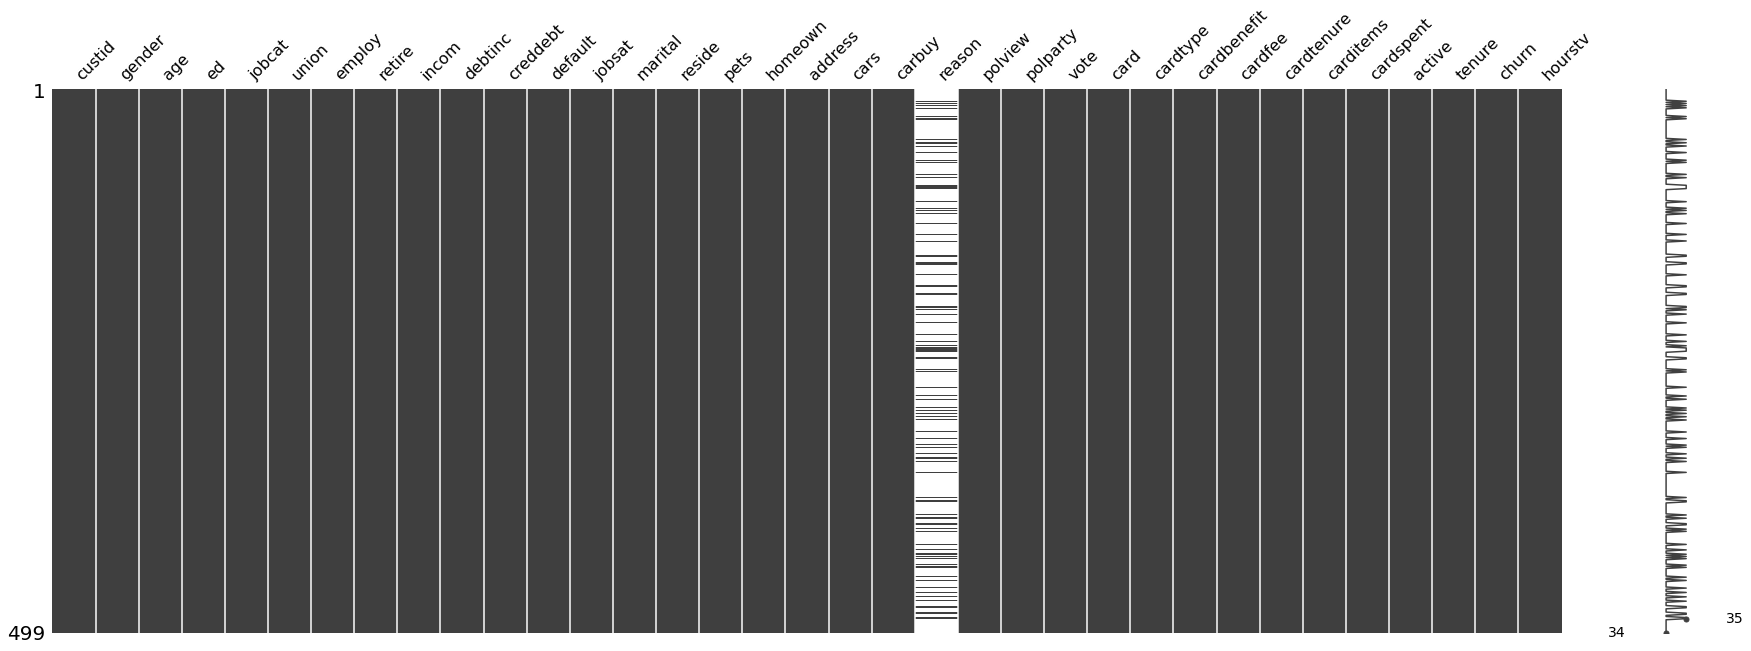

In [4]:
# Plot graphic of missing values
missingno.matrix(raw, figsize = (30,10))

In [5]:
to_drop = ['reason']
raw = raw.drop(to_drop, axis=1)

In [6]:
raw.head()

,custid,gender,age,ed,jobcat,union,employ,retire,incom,debtinc,creddebt,default,jobsat,marital,reside,pets,homeown,address,cars,carbuy,polview,polparty,vote,card,cardtype,cardbenefit,cardfee,cardtenure,carditems,cardspent,active,tenure,churn,hourstv
0,1071-IRJZAI-Z7U,0,50,21,1,0,7,0,90,8.6,3.568140,0,4,1,2,0,1,24,0,0,4,0,1,1,1,4,0,26,12,651.05,1,53,0,17
1,7180-SGFDZT-VUS,0,47,11,1,0,10,0,32,1.3,0.177216,0,3,0,1,1,0,13,1,0,3,0,1,5,3,3,0,19,3,52.10,1,46,0,20
2,9716-WKBJBO-YPB,1,43,14,5,0,9,0,41,20.5,4.900115,1,5,0,1,4,0,8,4,1,1,1,0,1,1,1,0,5,14,386.77,1,12,0,23
3,9309-TCQCUO-K1U,0,37,12,2,0,2,0,40,7.5,0.447000,0,2,0,1,1,0,14,3,0,4,0,0,1,3,3,1,2,9,178.61,0,4,1,21
4,6731-UKEQRV-6ZB,1,44,11,6,1,15,0,67,1.5,0.188940,0,3,1,4,7,0,14,5,1,6,0,1,2,2,1,0,26,13,894.94,0,68,0,17


# Split between test and train sets

In [7]:
df_train, df_test = sklearn.model_selection.train_test_split(raw, train_size=400, test_size=99)

# ****Remove Outliers 
(only extreme, depending on the case)

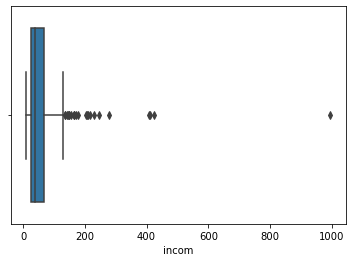

In [8]:
sns.boxplot(df_train['incom'])

In [9]:
Q1 = df_train["incom"].quantile(0.25)

Q3 = df_train["incom"].quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (3 * IQR)

Upper_Fence = Q3 + (3 * IQR)

In [11]:
max(df_train['incom'])

196

In [10]:
# remove EXTREME outliers only
df_train = df_train[~((df_train["incom"] < Lower_Fence) |(df_train["incom"] > Upper_Fence))]

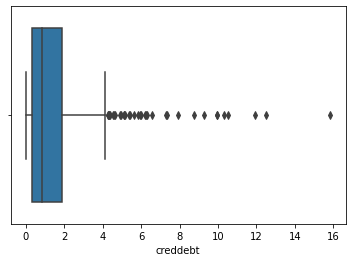

In [11]:
sns.boxplot(df_train['creddebt'])

In [12]:
Q1 = df_train["creddebt"].quantile(0.25)

Q3 = df_train["creddebt"].quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (3 * IQR)

Upper_Fence = Q3 + (3 * IQR)

In [13]:
df_train = df_train[~((df_train["creddebt"] < Lower_Fence) |(df_train["creddebt"] > Upper_Fence))]

In [16]:
max(df_train['creddebt'])

6.326034

In [30]:
#removed extreme outlier
#df_train = df_train[df_train.creddebt < 7]

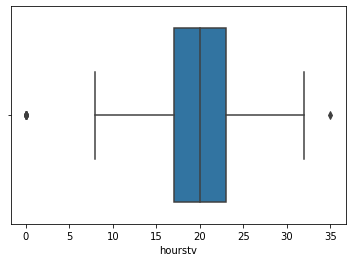

In [14]:
sns.boxplot(df_train['hourstv'])

In [15]:
Q1 = df_train["hourstv"].quantile(0.25)

Q3 = df_train["hourstv"].quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)

Upper_Fence = Q3 + (1.5 * IQR)


In [16]:
df_train = df_train[~((df_train["hourstv"] < Lower_Fence) |(df_train["hourstv"] > Upper_Fence))]

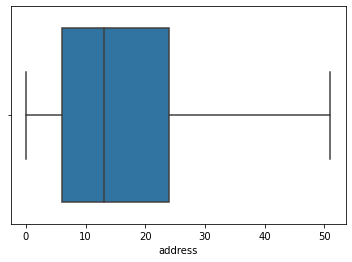

In [17]:
sns.boxplot(df_train['address'])

In [21]:
Q1 = df_train["address"].quantile(0.25)

Q3 = df_train["address"].quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)

Upper_Fence = Q3 + (1.5 * IQR)

In [22]:
df_train = df_train[~(df_train["address"] > Upper_Fence)]

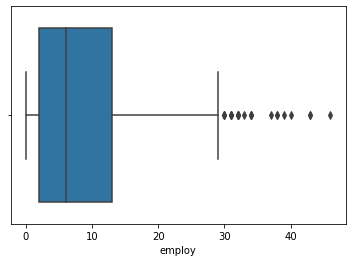

In [18]:
sns.boxplot(df_train['employ'])

In [50]:
raw.employ.value_counts()

0     59
1     49
5     33
3     30
2     28
4     26
7     25
6     24
15    20
10    18
8     18
11    17
13    16
12    14
9     13
14    13
19     9
22     7
20     7
32     7
16     6
24     5
18     5
17     5
30     5
31     5
23     4
27     4
34     3
25     3
26     3
28     3
39     2
38     2
29     2
21     2
43     2
33     1
35     1
37     1
40     1
46     1
Name: employ, dtype: int64

In [26]:
max(df_train['employ'])

46

In [19]:
Q1 = df_train["employ"].quantile(0.25)

Q3 = df_train["employ"].quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (3 * IQR)

Upper_Fence = Q3 + (3 * IQR)

In [20]:
df_train = df_train[~((df_train["employ"] < Lower_Fence) |(df_train["employ"] > Upper_Fence))]

In [30]:

max(df_train['cardspent'])

964.9200000000001

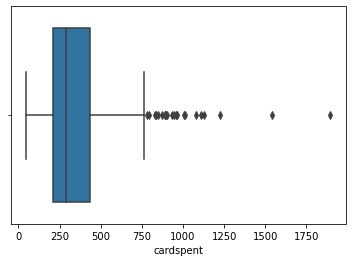

In [21]:
sns.boxplot(df_train['cardspent'])

In [22]:
Q1 = df_train["cardspent"].quantile(0.25)

Q3 = df_train["cardspent"].quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (3 * IQR)

Upper_Fence = Q3 + (3 * IQR)

In [23]:
df_train = df_train[~((df_train["cardspent"] < Lower_Fence) |(df_train["cardspent"] > Upper_Fence))]

In [24]:
#cleaned train set
df_train.describe()

,gender,age,ed,jobcat,union,employ,retire,incom,debtinc,creddebt,default,jobsat,marital,reside,pets,homeown,address,cars,carbuy,polview,polparty,vote,card,cardtype,cardbenefit,cardfee,cardtenure,carditems,cardspent,active,tenure,churn,hourstv
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.476454,45.936288,14.686981,2.761773,0.160665,9.335180,0.141274,47.415512,9.159834,1.313362,0.213296,2.900277,0.481994,2.202216,3.069252,0.664820,16.033241,2.160665,0.357341,4.096953,0.340720,0.534626,2.609418,2.445983,2.523546,0.210526,16.229917,10.656510,344.042659,0.468144,38.279778,0.252078,20.166205
std,0.500138,17.730508,3.381169,1.717162,0.367731,9.670752,0.348788,31.643662,6.373379,1.350588,0.410204,1.378818,0.500369,1.398648,3.394959,0.472709,12.706473,1.334043,0.479881,1.353603,0.474609,0.499492,1.217840,1.182273,1.130450,0.408248,11.780388,3.412968,201.633377,0.499677,22.523860,0.434808,4.499391
min,0.000000,18.000000,7.000000,1.000000,0.000000,0.000000,0.000000,9.000000,0.100000,0.005016,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,45.090000,0.000000,1.000000,0.000000,8.000000
25%,0.000000,31.000000,12.000000,1.000000,0.000000,2.000000,0.000000,25.000000,4.300000,0.334305,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,6.000000,1.000000,0.000000,3.000000,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000,6.000000,8.000000,206.430000,0.000000,19.000000,0.000000,17.000000
50%,0.000000,44.000000,15.000000,2.000000,0.000000,6.000000,0.000000,38.000000,7.700000,0.817344,0.000000,3.000000,0.000000,2.000000,2.000000,1.000000,13.000000,2.000000,0.000000,4.000000,0.000000,1.000000,3.000000,2.000000,3.000000,0.000000,14.000000,10.000000,288.520000,0.000000,38.000000,0.000000,20.000000
75%,1.000000,60.000000,17.000000,4.000000,0.000000,14.000000,0.000000,65.000000,12.200000,1.823808,0.000000,4.000000,1.000000,3.000000,5.000000,1.000000,24.000000,3.000000,1.000000,5.000000,1.000000,1.000000,4.000000,4.000000,4.000000,0.000000,25.000000,13.000000,432.870000,1.000000,59.000000,1.000000,23.000000
max,1.000000,79.000000,22.000000,6.000000,1.000000,46.000000,1.000000,179.000000,40.700000,6.547086,1.000000,5.000000,1.000000,7.000000,16.000000,1.000000,51.000000,7.000000,1.000000,7.000000,1.000000,1.000000,5.000000,4.000000,4.000000,1.000000,40.000000,21.000000,1111.540000,1.000000,72.000000,1.000000,32.000000


In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 497 to 6
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   custid       363 non-null    object 
 1   gender       363 non-null    int64  
 2   age          363 non-null    int64  
 3   ed           363 non-null    int64  
 4   jobcat       363 non-null    int64  
 5   union        363 non-null    int64  
 6   employ       363 non-null    int64  
 7   retire       363 non-null    int64  
 8   incom        363 non-null    int64  
 9   debtinc      363 non-null    float64
 10  creddebt     363 non-null    float64
 11  default      363 non-null    int64  
 12  jobsat       363 non-null    int64  
 13  marital      363 non-null    int64  
 14  reside       363 non-null    int64  
 15  pets         363 non-null    int64  
 16  homeown      363 non-null    int64  
 17  address      363 non-null    int64  
 18  cars         363 non-null    int64  
 19  carbuy  

# **** split between dependent and independent

In [25]:
df_train_c = df_train.copy()

In [26]:
X = df_train_c.loc[:, df_train_c.columns != 'incom']
y = df_train_c.loc[:, df_train_c.columns == 'incom']

df_train_ID = df_train.custid
df_test_ID = df_test.custid


X = X.loc[:, X.columns != 'custid']

# ***first glance at variables**

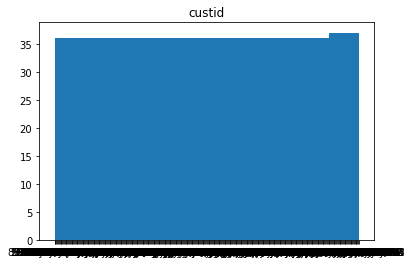

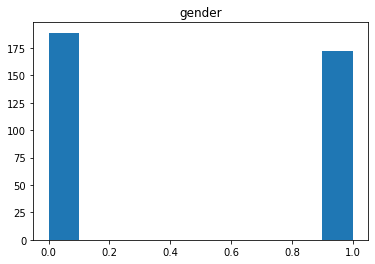

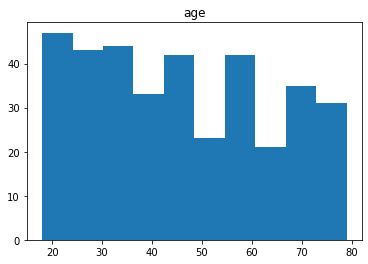

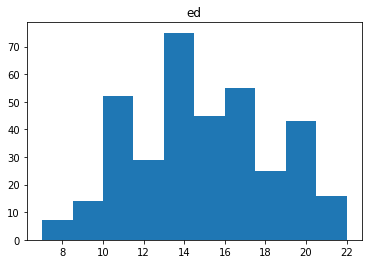

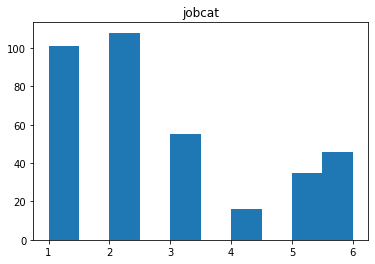

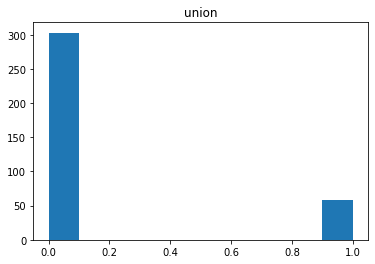

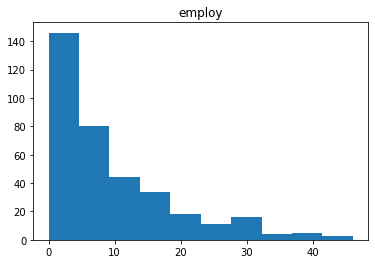

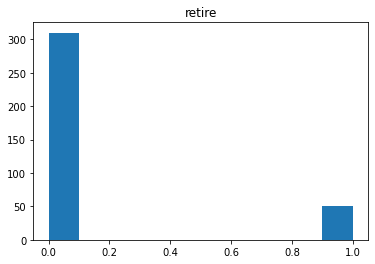

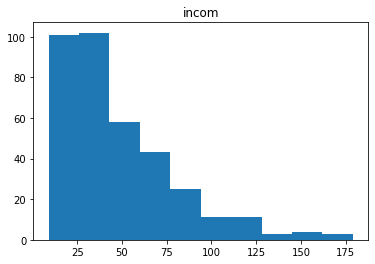

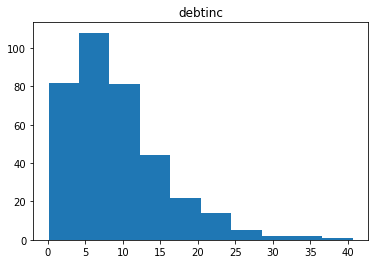

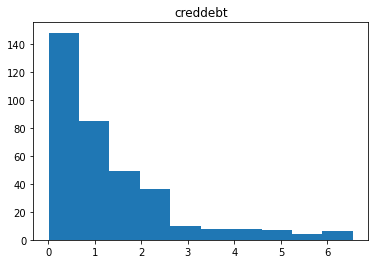

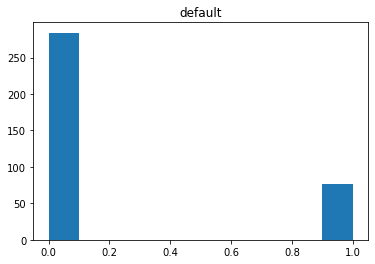

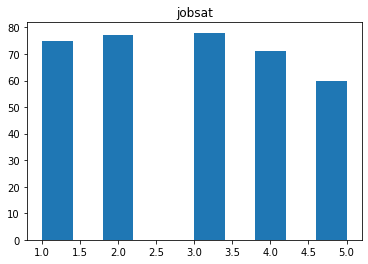

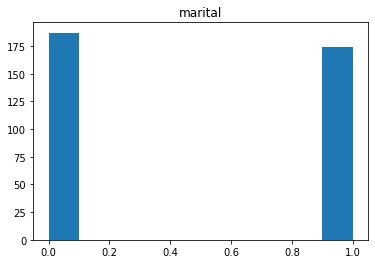

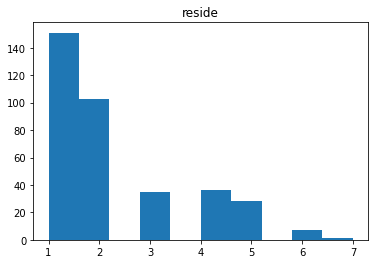

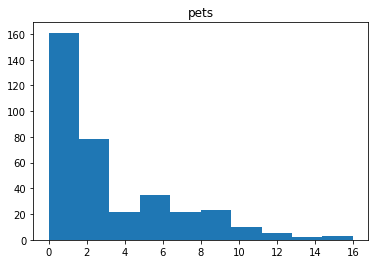

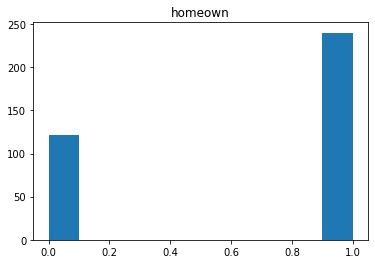

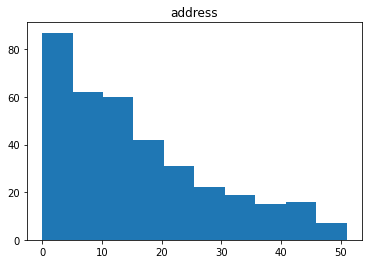

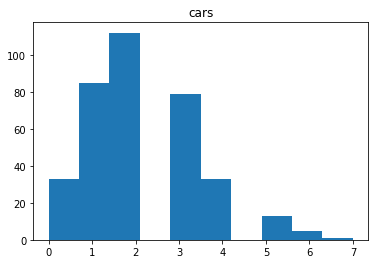

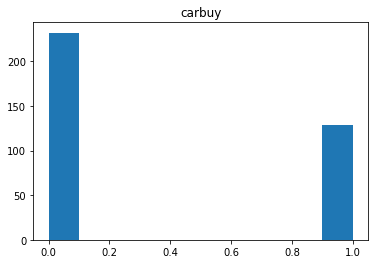

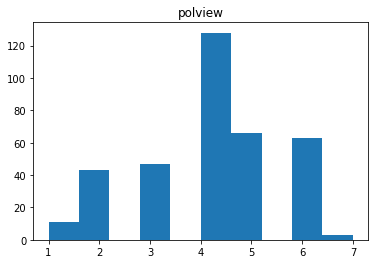

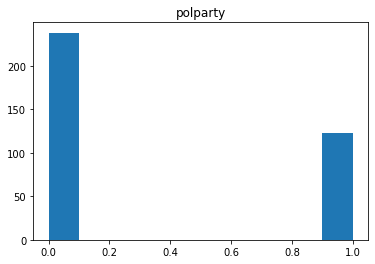

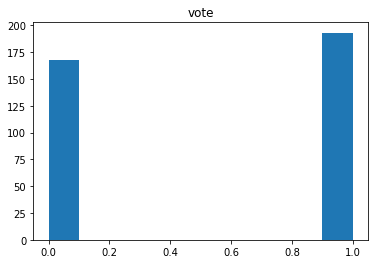

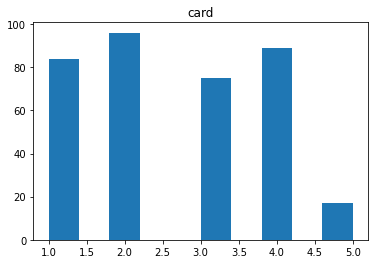

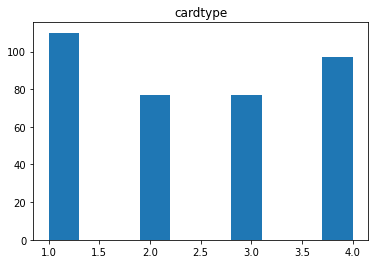

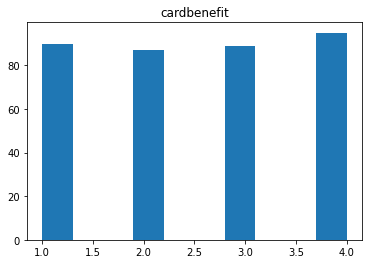

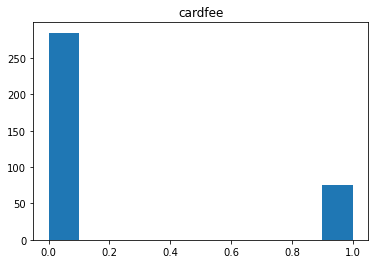

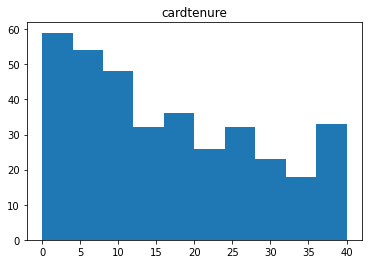

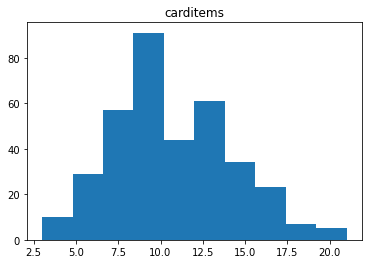

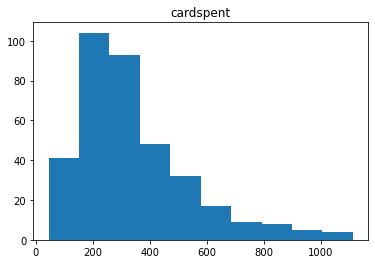

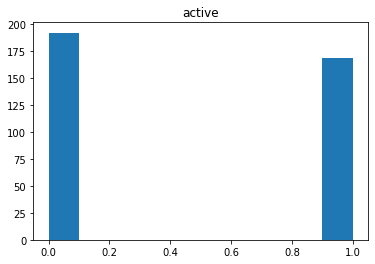

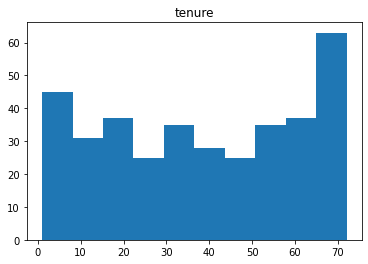

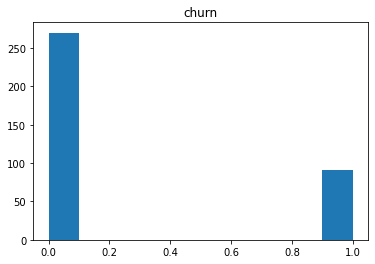

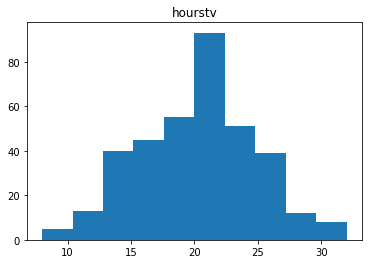

In [135]:
for i in df_train_c.columns:
    plt.hist(df_train_c[i])
    plt.title(i)
    plt.show()

In [ ]:
#categorical >> coded 0,1
#gender,union,retire,default,marital,homeown,carbuy,polaprty,vote,cardfee,active,churn

#discrete
#jobcat,jobsat,cars,polview,card,cardtype,cardbenefit


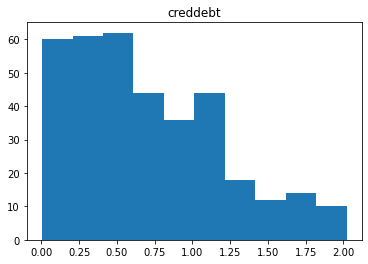

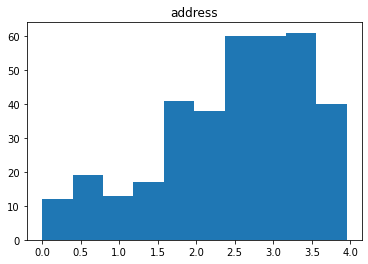

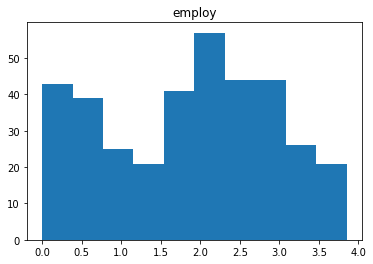

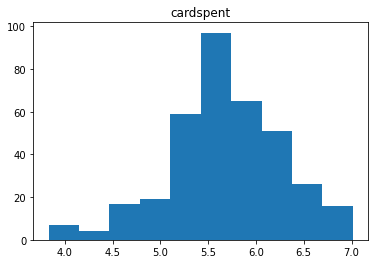

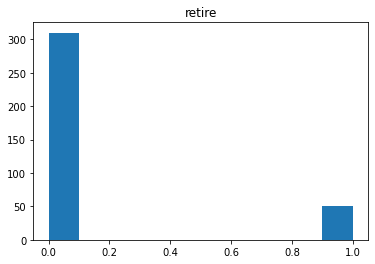

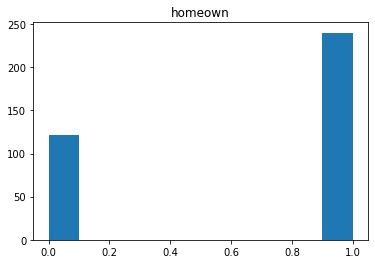

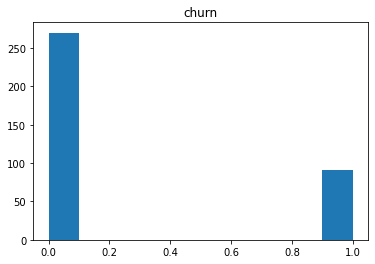

In [136]:
#view only normalized variables that went into the linear regression!
for i in X_train_to_model.columns:
    plt.hist(X_train_to_model[i])
    plt.title(i)
    plt.show()

# Remember
# categorical coded 0,1 >> gender,union,retire,default,marital,homeown,carbuy,polaprty,vote,cardfee,active,churn

# discrete >> jobcat,jobsat,cars,polview,card,cardtype,cardbenefit

# continuous >> employ, debtinc, reside, pets, address,cardtenure, cardspent



# ****Check data skewness

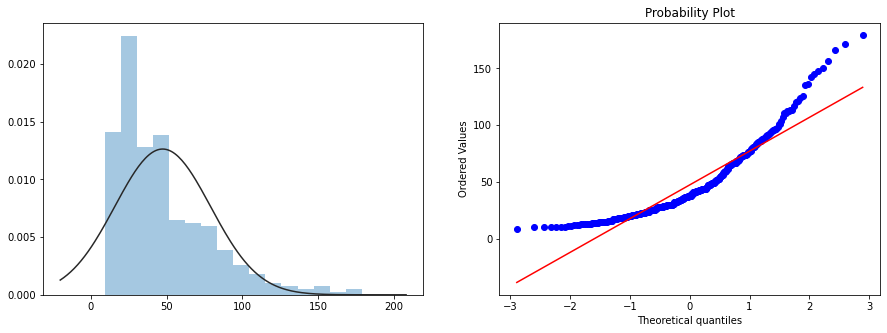

Fisher-Pearson coeficient of skewness: 1.44


In [27]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.distplot(y, fit=stats.norm, ax=ax[0], kde=False)
stats.probplot(y.incom,  plot=ax[1])
plt.show()
print(f'Fisher-Pearson coeficient of skewness: {stats.skew(y.incom.values):.2f}')

# ****any skewness higher than 0.5 will be transformed

In [28]:
numerical_columns = X.loc[:, ~X.columns.isin(['gender','union','retire','default','marital','homeown','carbuy','polparty','vote','cardfee','active','churn'])].select_dtypes(include=['int', 'float']).columns
sk = X[numerical_columns].apply(lambda x: stats.skew(x.dropna())).to_frame('Fisher-Pearson Coef')
skw_cols = list(sk[abs(sk['Fisher-Pearson Coef']) > 0.5].index)
sk[abs(sk['Fisher-Pearson Coef']) > 0.5]

,Fisher-Pearson Coef
jobcat,0.761167
employ,1.401800
debtinc,1.331230
creddebt,1.762277
reside,1.088626
pets,1.249503
address,0.804659
cars,0.562028
cardspent,1.309324


# apply logarithm to both X and Y!

In [29]:
lmbda = 0.0
X[skw_cols] = X[numerical_columns].loc[:, X[numerical_columns].columns.isin(skw_cols)].apply(lambda x: stats.boxcox(1+x, lmbda=lmbda))

In [30]:
y = y.apply(lambda x: stats.boxcox(1+x, lmbda=lmbda))

In [102]:
yy = np.exp(y_newpred_2)

In [104]:
yy.describe()

count     99.000000
mean      52.640938
std       30.870177
min       13.897635
25%       31.341433
50%       48.406134
75%       68.919543
max      181.828181
dtype: float64

In [31]:
# removed skewness, before and after
sk['Fisher-Pearson Coef (After)'] = X[numerical_columns].apply(lambda x: stats.skew(x))
sk[sk.index.isin(skw_cols)]

,Fisher-Pearson Coef,Fisher-Pearson Coef (After)
jobcat,0.761167,0.295401
employ,1.401800,-0.251925
debtinc,1.331230,-0.445566
creddebt,1.762277,0.698802
reside,1.088626,0.587830
pets,1.249503,0.118076
address,0.804659,-0.710973
cars,0.562028,-0.641767
cardspent,1.309324,-0.352798


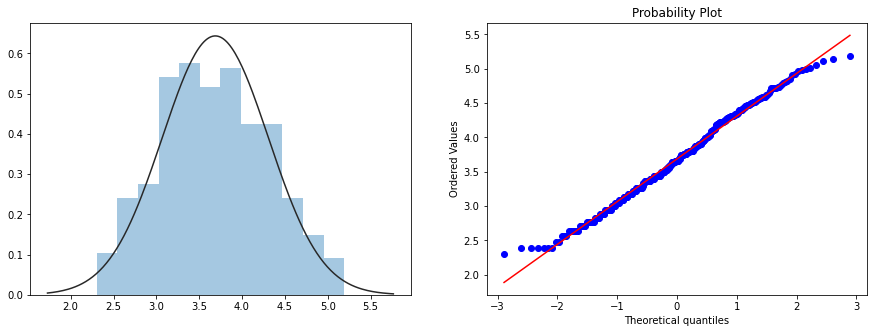

Fisher-Pearson coeficient of skewness: 0.08


In [32]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.distplot(y, fit=stats.norm, ax=ax[0], kde=False)
stats.probplot(y.incom,  plot=ax[1])
plt.show()
print(f'Fisher-Pearson coeficient of skewness: {stats.skew(y.incom.values):,.2f}')

# ****selecting features and checking correlation

# numerical cols

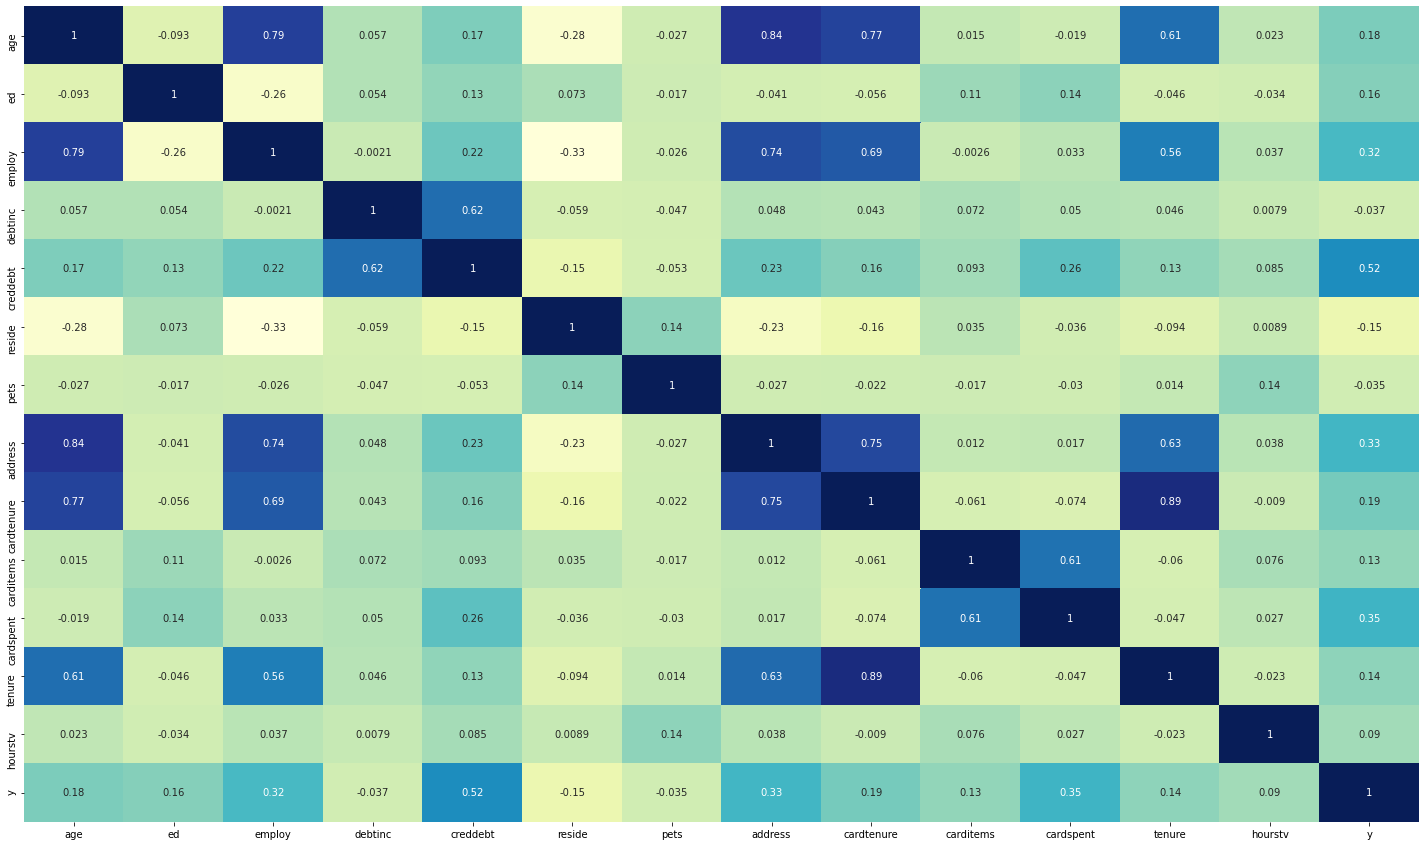

In [33]:
X_disc = X.loc[:,~(X.columns.isin(['jobcat','jobsat','cars','polview','card','cardtype','cardbenefit'])) &
                  (X.columns.isin(numerical_columns))]

X_disc['y'] = y

_, ax = plt.subplots(figsize=(25,15))

sns.heatmap(X_disc.corr(), annot=True, cbar=False, cmap='YlGnBu')
plt.show()

# filter cols that have a correlation with y higher than 0.25

In [35]:
mask = (abs(X_disc.corr()['y'] >= 0.25))
corr_variables = X_disc.corr()['y'][mask]
corr_variables = list(corr_variables[corr_variables.index != 'y'].index)

corr_variables

['employ', 'creddebt', 'address', 'cardspent']

# remove independent variables that have high colinearity > 0.75

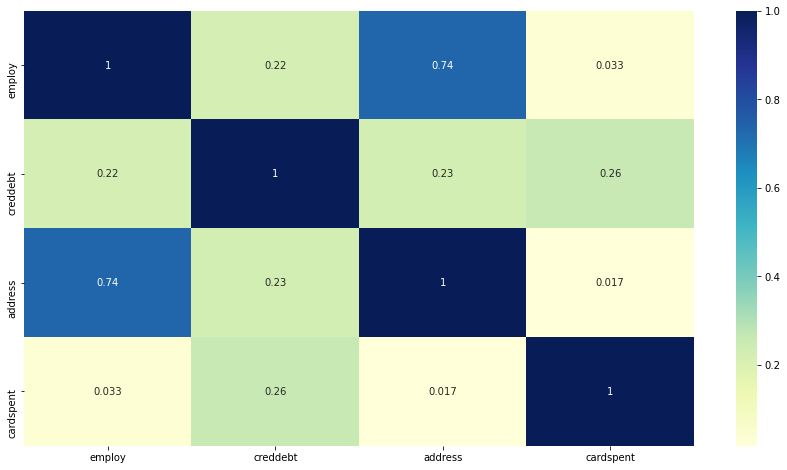

In [36]:
_, ax = plt.subplots(figsize=(15,8))

sns.heatmap(X_disc.loc[:, corr_variables].corr(), annot=True, cbar=True, cmap='YlGnBu')
plt.show()

In [37]:
mask = ((abs(X_disc.loc[:, corr_variables].corr()) > 0.8) & 
        (X_disc.loc[:, corr_variables].corr() != 1.0))
cols = list(X_disc.loc[:, corr_variables].corr()[mask].dropna(how='all', axis=1).columns)

to_remove = []

for i in range(0,len(cols),2):
    to_remove.append(cols[i])
    
continous_features = list(set(corr_variables) - set(to_remove))
continous_features

['creddebt', 'address', 'employ', 'cardspent']

# let's look at discrete cols

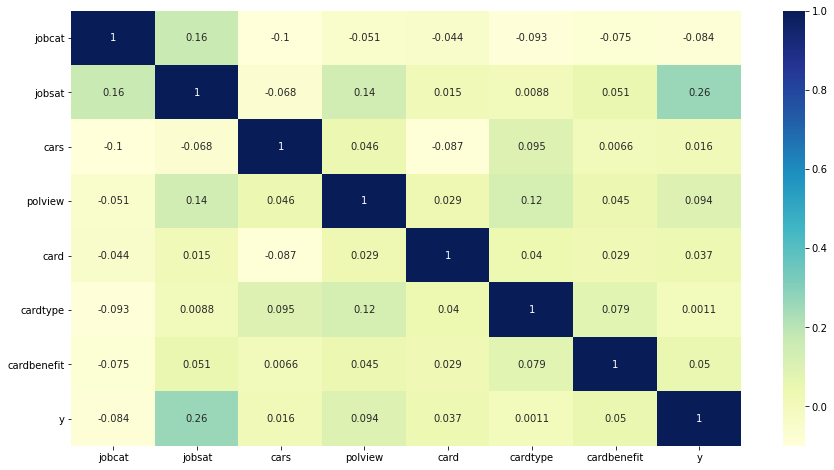

In [38]:
X_discrete = X.loc[:, X.columns.isin(['jobcat','jobsat','cars','polview','card','cardtype','cardbenefit'])]
X_discrete['y'] = y

_, ax = plt.subplots(figsize=(15,8))

sns.heatmap(X_discrete.corr('spearman'), annot=True, cmap='YlGnBu')
plt.show()

In [39]:
mask = (((abs(X_discrete.corr('spearman')['y']) >= 0.2) &
       (X_discrete.corr('spearman')['y'] != 1.0)))
X_discrete_cols = list(X_discrete.corr('spearman')['y'][mask].index)
discrete_features = list(set(X_discrete_cols))

In [40]:
continous_features

['creddebt', 'address', 'employ', 'cardspent']

In [41]:
discrete_features

['jobsat']

In [42]:
X_num = X.loc[:, X.columns.isin(continous_features + discrete_features)]
X_num['y'] = y

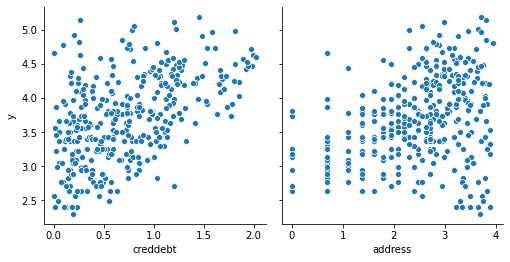

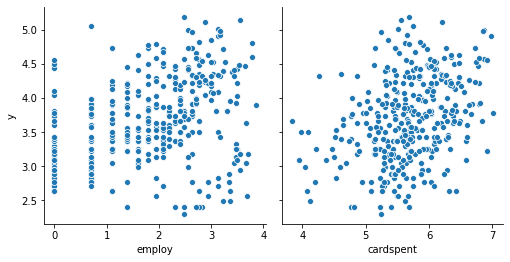

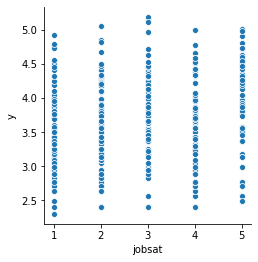

In [44]:
sns.pairplot(x_vars=continous_features[:int(len(continous_features)/2)],
             y_vars=['y'],
            data=X_num,
            height=3.5)

sns.pairplot(x_vars=continous_features[int(len(continous_features)/2):],
             y_vars=['y'],
            data=X_num,
            height=3.5)

sns.pairplot(x_vars=discrete_features,
             y_vars=['y'],
            data=X_num,
            height=3.5)

plt.show()

# dichotomous variables (coded 0-1)

In [45]:
dico = ['gender','union','retire','default','marital','homeown','carbuy','polparty','vote','cardfee','active','churn']

# Training and testing!

In [46]:
# X, include only the filtered columns
features = continous_features + discrete_features + dico
X = X[features]
y = y


In [47]:
X_train = X
y_train = y

In [48]:
#for text, split between x and y
X_test = df_test.loc[:, df_test.columns != 'incom']
y_test = df_test.loc[:, df_test.columns == 'incom']


In [49]:
X_test.head()

,custid,gender,age,ed,jobcat,union,employ,retire,debtinc,creddebt,default,jobsat,marital,reside,pets,homeown,address,cars,carbuy,polview,polparty,vote,card,cardtype,cardbenefit,cardfee,cardtenure,carditems,cardspent,active,tenure,churn,hourstv
96,4215-NCRPOV-WJH,0,45,20,1,0,3,0,14.2,1.927224,0,2,1,5,7,0,22,1,0,6,0,1,4,1,4,0,3,13,259.85,1,13,1,24
419,2413-GXKYMJ-2M3,0,18,13,1,0,0,0,13.8,3.017784,1,2,1,6,0,1,0,2,0,4,0,0,4,3,4,0,0,10,144.23,1,10,0,16
193,9479-CQKHZE-55V,0,77,17,1,0,16,0,2.8,0.279720,0,3,1,2,0,1,48,2,0,2,1,1,4,3,3,0,40,9,186.22,0,72,0,17
267,6891-KEMHFO-JU6,1,47,12,1,0,11,0,5.6,1.562792,1,2,1,2,0,1,4,2,0,2,0,1,3,1,1,1,5,12,370.28,1,5,1,16
12,2921-DTOPPT-VTK,1,55,18,1,0,4,0,2.9,0.849555,0,2,1,4,1,1,26,3,1,5,1,0,2,2,2,0,11,10,544.70,1,34,1,22


In [50]:
#let's copy X_train so we can reset and remove variables easily

X_train_to_model = X_train.copy()

In [51]:
X_train_to_model.head()

,creddebt,address,employ,cardspent,jobsat,gender,union,retire,default,marital,homeown,carbuy,polparty,vote,cardfee,active,churn
326,1.023141,2.772589,0.693147,5.123607,1,0,0,0,0,1,1,0,1,1,0,1,0
484,0.275397,1.098612,0.693147,5.300415,3,0,1,0,1,0,0,1,0,0,0,1,1
206,0.788243,0.000000,0.000000,6.026759,1,0,0,0,1,0,0,0,0,1,0,0,0
219,0.742199,3.891820,2.639057,4.857795,3,0,0,1,0,0,1,0,0,0,0,0,0
183,1.431178,3.637586,1.945910,6.473597,5,0,0,0,1,1,0,0,0,0,0,0,0


# from the whole X_train data set, these are the variables we removed after testing in the linear regression (due to insignificance)

In [56]:
#removed
#'union','marital','default','polparty','active','vote','carbuy','jobsat','cardtenure','cardfee','gender'
to_drop_from_model = ['union','marital','default','polparty','active','vote','carbuy','jobsat','cardfee','vote','gender']
X_train_to_model = X_train_to_model.drop(to_drop_from_model, axis=1)

# drop the same variables from the test set

In [60]:
#'union','marital','default','polparty','active','vote','carbuy','jobsat','cardtenure','cardfee'
keep_on_test = ['employ','address','creddebt','cardspent','retire','homeown','churn']
X_test = X_test[keep_on_test]

In [168]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 364 to 195
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   employ     99 non-null     int64  
 1   address    99 non-null     int64  
 2   creddebt   99 non-null     float64
 3   cardspent  99 non-null     float64
 4   retire     99 non-null     int64  
 5   homeown    99 non-null     int64  
 6   churn      99 non-null     int64  
dtypes: float64(2), int64(5)
memory usage: 8.7 KB


# Linear regression

In [57]:
linear_reg = sm.OLS(y_train, X_train_to_model)

In [58]:
results = linear_reg.fit()

In [148]:
importance = results.coef_[0]

AttributeError: 'OLSResults' object has no attribute 'coef_'

In [59]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  incom   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              3820.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):                        0.00
Time:                        16:21:28   Log-Likelihood:                         -205.45
No. Observations:                 361   AIC:                                      424.9
Df Residuals:                     354   BIC:                                      452.1
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [137]:
# standardized coefficients
df_z = X_train_to_model.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)

In [138]:
linear_reg_stz = sm.OLS(y_train, df_z)

In [139]:
results_stz = linear_reg_stz.fit()

In [140]:
print(results_stz.summary())

                                 OLS Regression Results                                
Dep. Variable:                  incom   R-squared (uncentered):                   0.016
Model:                            OLS   Adj. R-squared (uncentered):             -0.003
Method:                 Least Squares   F-statistic:                             0.8263
Date:                Tue, 22 Dec 2020   Prob (F-statistic):                       0.566
Time:                        17:23:57   Log-Likelihood:                         -985.48
No. Observations:                 361   AIC:                                      1985.
Df Residuals:                     354   BIC:                                      2012.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Actual vs Predicted

In [86]:
X_test.head()

,employ,address,creddebt,cardspent,retire,homeown,churn
96,1.386294,3.135494,1.074055,5.563946,0,0,1
419,0.000000,0.000000,1.390731,4.978319,0,1,0
193,2.833213,3.891820,0.246641,5.232284,0,1,0
267,2.484907,1.609438,0.941097,5.916956,0,1,1
12,1.609438,3.295837,0.614945,6.302069,0,1,1


# transform the test set,same as for train

In [74]:
numerical_columns = X_test.loc[:, ~X_test.columns.isin(['gender','union','retire','default','marital','homeown','carbuy','polparty','vote','cardfee','active','churn'])].select_dtypes(include=['int', 'float']).columns
sk = X_test[numerical_columns].apply(lambda x: stats.skew(x.dropna())).to_frame('Fisher-Pearson Coef')
skw_test_cols = list(sk[abs(sk['Fisher-Pearson Coef']) > 0.5].index)
sk[abs(sk['Fisher-Pearson Coef']) > 0.5]

,Fisher-Pearson Coef
employ,1.140306
address,1.078509
creddebt,2.899343
cardspent,2.087318


In [75]:
lmbda = 0.0
X_test[skw_test_cols] = X_test[numerical_columns].loc[:, X_test[numerical_columns].columns.isin(skw_test_cols)].apply(lambda x: stats.boxcox(1+x, lmbda=lmbda))

In [76]:
# removed skewness, before and after
sk['Fisher-Pearson Coef (After)'] = X_test[numerical_columns].apply(lambda x: stats.skew(x))
sk[sk.index.isin(skw_test_cols)]

,Fisher-Pearson Coef,Fisher-Pearson Coef (After)
employ,1.140306,-0.546980
address,1.078509,-0.682762
creddebt,2.899343,1.131133
cardspent,2.087318,-0.142950


In [77]:
X_test.head()

,employ,address,creddebt,cardspent,retire,homeown,churn
96,1.386294,3.135494,1.074055,5.563946,0,0,1
419,0.000000,0.000000,1.390731,4.978319,0,1,0
193,2.833213,3.891820,0.246641,5.232284,0,1,0
267,2.484907,1.609438,0.941097,5.916956,0,1,1
12,1.609438,3.295837,0.614945,6.302069,0,1,1


In [141]:
y_newpred =  results.predict(X_test) # predict out of sample
print(y_newpred)

96     3.973031
419    2.709225
193    4.153457
267    4.306963
12     4.430503
398    2.631719
430    3.959763
78     3.556465
232    3.550873
100    3.646691
177    3.710248
469    3.932263
6      3.958825
443    5.203062
182    3.479286
230    3.415479
179    3.906483
422    4.006806
399    4.699559
437    4.329034
199    3.024002
66     3.809835
225    4.644994
431    3.956893
130    2.885867
103    3.469393
439    3.500149
208    2.920227
361    4.980527
143    4.910304
328    4.115342
299    3.879627
449    4.739340
13     4.525182
80     4.640334
340    3.456183
34     3.251017
360    4.316002
362    3.246854
492    3.221064
447    4.374958
251    3.974025
367    3.797440
276    3.088427
434    3.404939
165    4.017425
451    4.225463
187    4.261598
91     4.359207
289    2.944992
444    3.588626
72     4.253668
17     3.313429
270    3.038883
171    4.079189
147    3.610905
176    3.969644
423    3.049526
114    4.662038
475    4.438015
238    3.433571
305    3.922113
83     3

In [142]:
y_newpred = pd.DataFrame(y_newpred)

In [143]:
y_newpred.describe()

,0
count,99.000000
mean,3.805871
std,0.570513
min,2.631719
25%,3.444877
50%,3.879627
75%,4.232912
max,5.203062


In [144]:
y_newpred = np.exp(y_newpred)

In [120]:
y_test['incom']-y_nrepred[0]

96       4.854609
419     28.982375
193     26.346355
267    -15.214774
12     133.026368
398      1.102365
430    -21.444883
78      12.960875
232    -10.843709
100    -12.347565
177     -3.863939
469     13.977704
6      -31.395725
443    -20.828181
182     -2.436552
230     -2.431510
179     -3.723741
422     24.028983
399    -14.898643
437     16.129036
199     -8.573463
66      -2.143000
225    -47.062787
431    -34.294579
130     -7.919105
103     -1.117239
439     10.879630
208     -4.545506
361    -65.551120
143     60.319378
328    -34.273150
299      7.593866
449    -30.358685
13     -28.312727
80      38.421085
340     -6.695763
34       3.183430
360    -13.888659
362      4.290673
492     12.945243
447     -6.436518
251    -16.198234
367     -5.586903
276     13.057471
434     -6.112445
165    -15.557883
451    -23.406181
187    -16.923212
91     -54.195064
289     -1.010513
444     -9.184312
72      32.636970
17      -3.479201
270      9.118093
171     21.902472
147    -24

# Actual vs Predicted >> Result

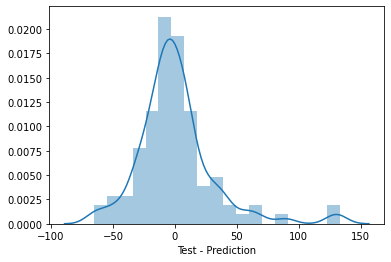

In [147]:
sns.distplot(y_test['incom']-y_newpred[0], axlabel="Test - Prediction")
plt.show()

# Understanding variable importance

we will use scikit to extract coefficients

In [149]:
n_fold = 5

def rmseModel(m):
    kf = KFold(n_splits=n_fold, random_state=0, shuffle=True).get_n_splits()
    rmse = np.sqrt(-cross_val_score(m, X, y, scoring='neg_mean_squared_error', cv=kf))
    return rmse

In [150]:
ols_reg = LinearRegression()

In [152]:
ols_reg_scores = rmseModel(ols_reg)
print(f'OLS Reg RMSE, mean: {np.mean(ols_reg_scores)}, stdv: {np.std(ols_reg_scores)}')

OLS Reg RMSE, mean: 0.41772221507791685, stdv: 0.03603171868277519


In [153]:
# fit the model
ols_reg.fit(df_z, y_train)

LinearRegression()

In [155]:
# get importance
importance = ols_reg.coef_[0]

In [156]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.18108
Feature: 1, Score: 0.11895
Feature: 2, Score: 0.23679
Feature: 3, Score: 0.12179
Feature: 4, Score: -0.31599
Feature: 5, Score: 0.05134
Feature: 6, Score: 0.06738


In [ ]:
from matplotlib import pyplot

In [157]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.coef_[0], 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    

,imp,col
4,-0.315987,retire
5,0.051341,homeown
6,0.067379,churn
1,0.118954,address
3,0.121789,cardspent
0,0.181082,creddebt
2,0.236788,employ


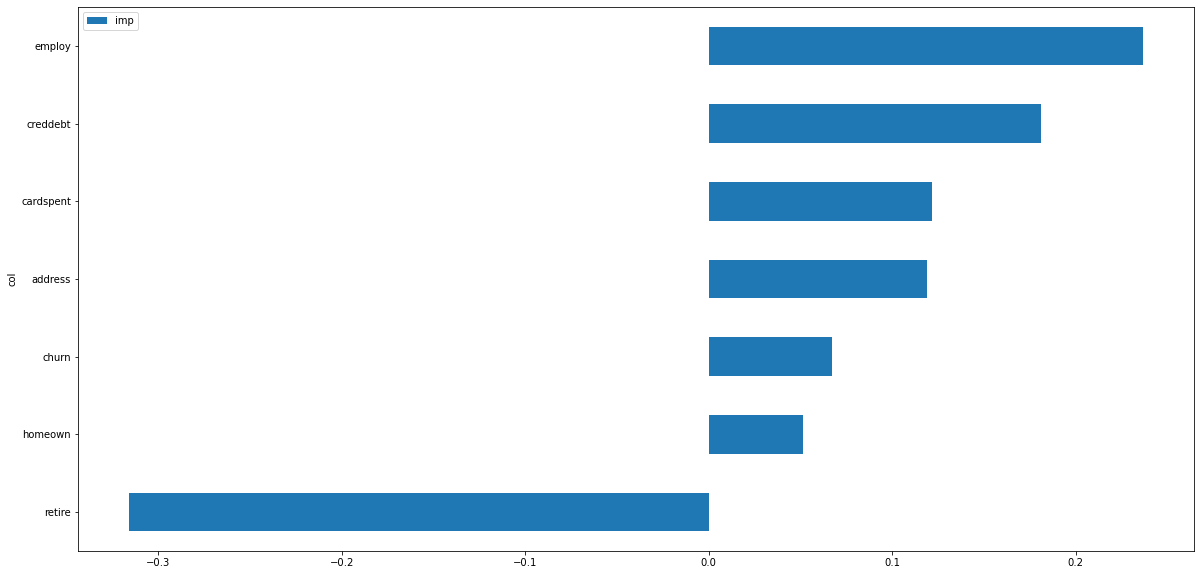

In [158]:
# Plot the feature importance scores
feature_importance(ols_reg, df_z)